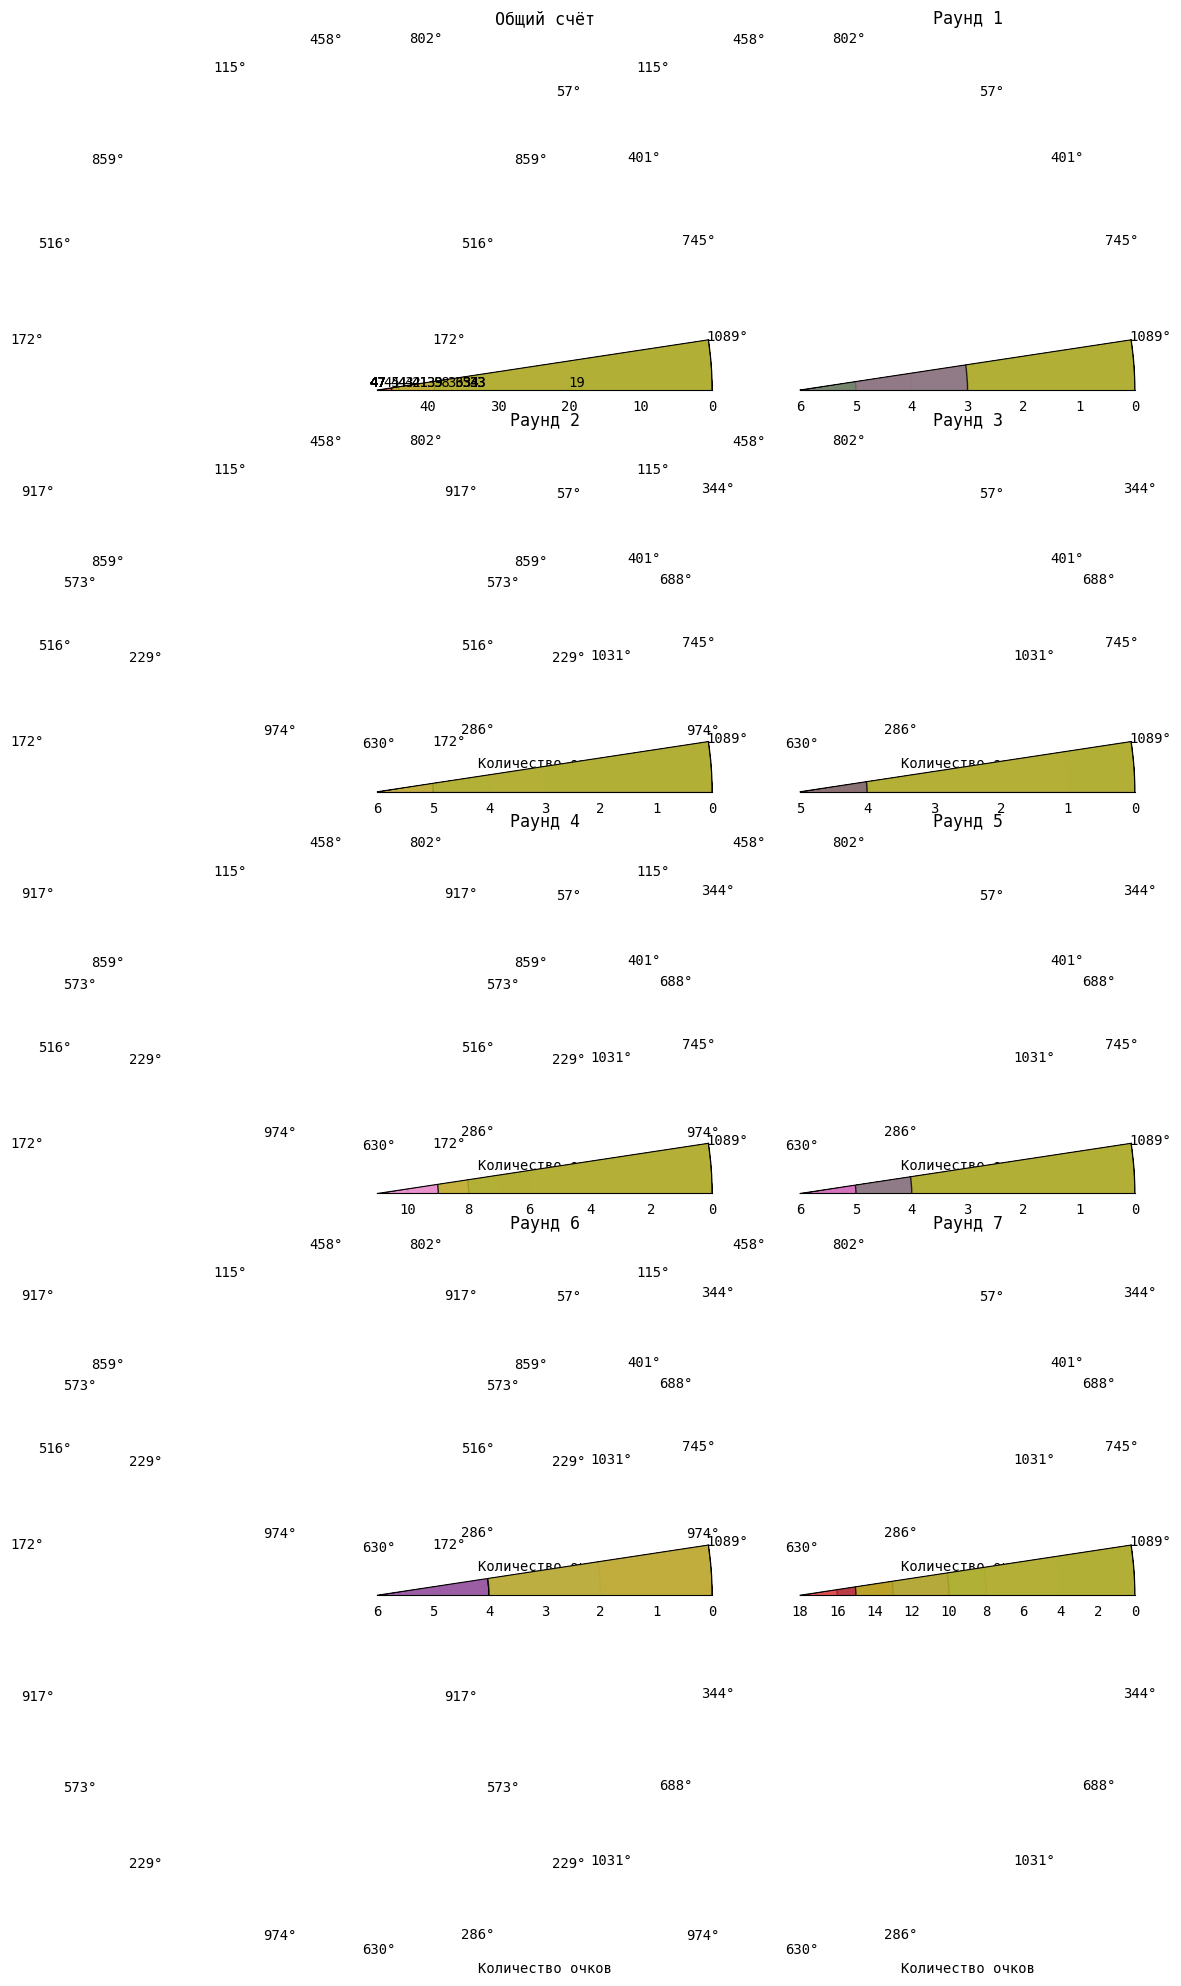

In [12]:

import sys

sys.path.append('../')

from matplotlib.axes import Axes
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from src.gamedb import offline_games_df as offline_df
import numpy as np
import matplotlib

fig: Figure
axs: list[Axes]
fig, axs = plt.subplots(4,2,figsize=(10, 20), subplot_kw={'projection': 'polar'})

matplotlib.rcParams['font.family'] = 'monospace'

team_name = 'Давайте ещё немного подумаем'

max_round_scores = [60,6,6,6,12,6,6,18]

team_data = offline_df.loc[offline_df['team_name'] == team_name]

# # Compute pie slices
indexes = list(range(0, len(team_data)))
width = 2*np.pi / len(team_data)
angles = [element * width for element in indexes]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(team_data))

# theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
# radii = 10 * np.random.rand(N)
# width = np.pi / 4 * np.random.rand(N)
# colors = plt.cm.viridis(radii / 10.)

# ax = plt.subplot(projection='polar')
# ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

ax:Axes
for round_number, ax in enumerate(axs.flat):
    is_total_score = (round_number == 0)
    round_name = f"round_{round_number}" if not is_total_score else 'final_score'

    ax.set_title(f"Раунд {round_number}")

    labels = []

    for idx, (ituple, row) in enumerate(team_data.iterrows()):
        team_score = row.loc[round_name]
        bar = ax.bar(x = angles, height=team_score, width=width, edgecolor='black', zorder=2, alpha=0.8)
        game_id = ituple[0]
        place = ituple[1]
        team_count = len(offline_df.loc[(game_id,),:])

        date = row.loc['date']
        location = row.loc['location']
        question_set = row.loc['question_set']

        if round_number % 2 == 0:
            # place = f"({item[0]})"
            place_string = f"{place} место"
            teams_string = f"{team_count} команд"
            labels.append(f"№{game_id} #{question_set}    {location:<20}    {date:<30}    {teams_string:<9}    {place_string:>8}")
        else:
            labels.append(place)
        
        if is_total_score:
            ax.bar_label(bar)
            ax.set_title("Общий счёт")

    # if round_number % 2 == 0:
    #     ax.set_yticklabels(labels)
    # else:
    #     ax.set_ylabel('Место')


    # ax.set_xlim(xmin=min(0, team_data[round_name].min()), xmax=max_round_scores[round_number])
    
    ax.set_xlabel('Количество очков')
    ax.margins(x=1, y=0)
    ax.invert_yaxis()

    ax.set_xticks(np.arange(1, len(team_data) + 1, step=1))
   

# polarplot(theta,rho)

plt.show()
